In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="Image", image=None, size=10):
    w,h=image.shape[0], image.shape[1]
    aspect_r=w/h
    plt.figure(figsize=(size*aspect_r,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


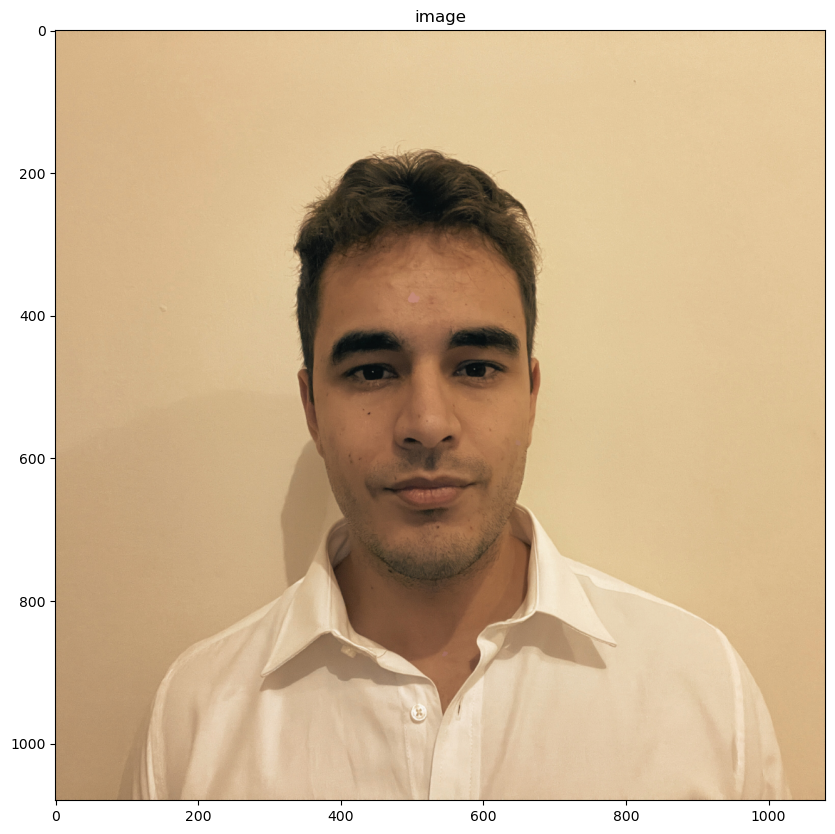

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

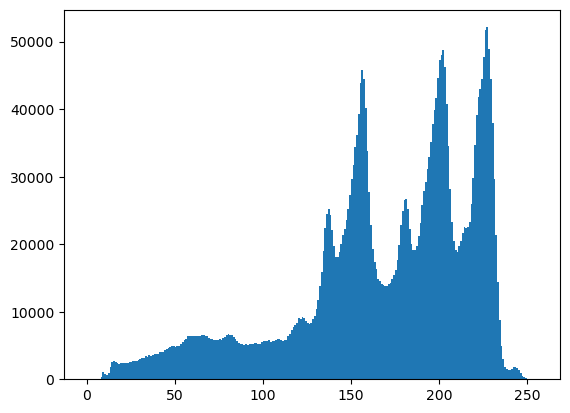

In [2]:
image = cv2.imread('remi.png')
imshow("image",image)
plt.hist(image.ravel(), 256, [0,256]);plt.imshow

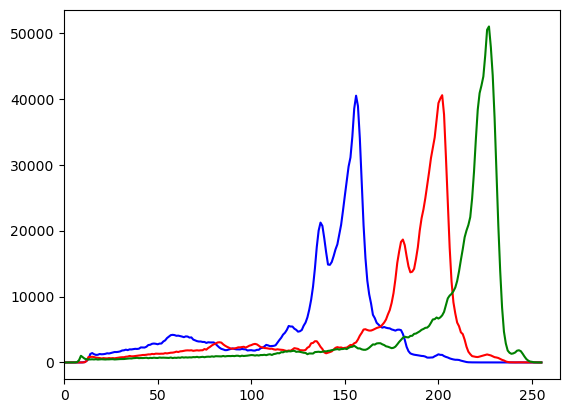

In [3]:
color=('b','r','g')

for i, col in enumerate(color):
    histogram2=cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(histogram2, color=col)
    plt.xlim([0,265])
plt.show()

In [4]:
#kmeans = grouping pixels of similar value together
def centroid_histogram(clt):
    numlabels=np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _)=np.histogram(clt.labels_, bins=numlabels)

    hist=hist.astype(float)
    hist/=hist.sum()
    return hist

def plot_colors(hist, centroids): 
    bar = np.zeros([100,500,3], dtype="uint8")

    x_start=0

    for (percent, color) in zip(hist,centroids):
        end = x_start+(percent*500)
        cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),color.astype("uint8").tolist(), -1)
        x_start=end
    return bar



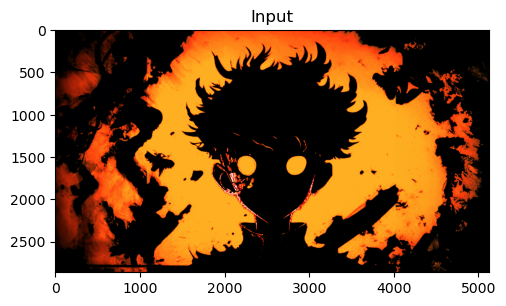

(2863, 5120, 3)
(14658560, 3)


c:\Users\jackie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


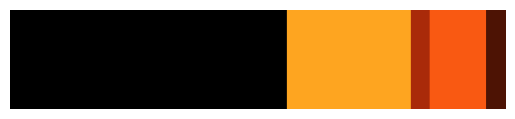

In [ ]:
from sklearn.cluster import KMeans

image = cv2.imread('1.jpeg')
imshow("Original", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

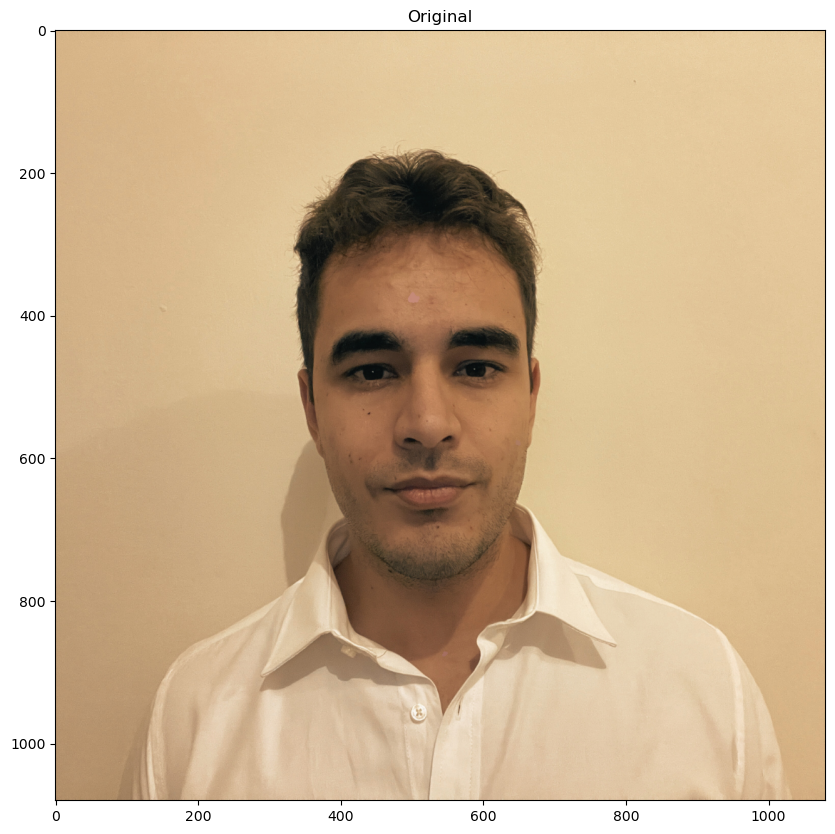

(1080, 1080, 3)
(1166400, 3)


c:\Users\jackie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


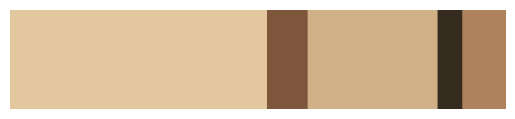

In [6]:

image = cv2.imread('remi.png')
imshow("Original", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()